# État de l'art des algorithmes d'optimisation multi-objectifs

Gabriel Henrique ALENCAR MEDEIROS

---

## Summary

### 1. [Introduction](#Introduction)

### 2. [Importing](#Importing)

### 3. [Autres Resultats](#AutresResultats)
* #### 3.1. [La comparaison entre NSGAI et NSGAII](#NSGAIIVSNSGAI)
* #### 3.2. [La comparaison entre NSGAI et NSGA II (MOGSA uniquement en continu)](#COMPMOGSAANDGSA)
* #### 3.3. [Comparaison entre différentes méthodes](#Comparaisonentredmethodes)

### 4. [Nos données](#donnees)

### 5. [Les méthodes](#Methodes)
* #### 5.1. [Non-dominated Sorting Genetic Algorithm II](#NSGA2)
* #### 5.2. [Non-dominated Sorting Genetic Algorithm III](#NSGA3)
* #### 5.3. [SPEA2](#SPEA2)
* #### 5.4. [Non-dominated Sorting Gravitational Search Algorithm](#NSGSA)
* #### 5.5. [Simple Cull algorithm](#SimpleCullAlgorithm)
* #### 5.6. [Pareto Simulated Annealing](#PSA)
* #### 5.7. [Binary Multi-Objective Tabu Search](#Tabu)
* #### 5.8. [Full Non-dominated Sorting and Ranking](#FullNSR)

### 6. [Comparaison des résultats](#ComparaisonDesResultats)

### 7. [Conclusion](#Conclusion)

### 8. [Annexe A - Autres algorithmes](#AnnexeA)
* #### 8.1. [Pareto Ant Colony](#ParetoAntColony)
* #### 8.2. [Multi-Objective Particle Swarm](#MOPS)
---

<a id='Introduction'></a>
## 1. Introduction

Nous verrons ici une analyse de plusieurs méthodes d’algorithmes d'optimisation mettant l’accent sur l’optimisation à objectifs multiples. Pour chaque méthode, nous aurons une introduction, une méthodologie, une implémentation, une conclusion et une bibliographie.

> **L'implémentation sera sur la même entrée et les codes peuvent être trouvés dans les helpers.**

---

<a id='Importing'></a>
## 2. Importing

Ici, nous allons importer les librairies nécessaires à l'exécution des codes. Nous aurons importé des librairies classiques trouvées sur Internet et des librairies personnalisés où nous trouverons les classes liées à chaque méthode.

---

### 2.1 Importation des librairies classiques

In [1]:
import time
import numpy as np
import pandas as pd
import random
from deap import benchmarks
import copy

### 2.2. Importation de librairies personnalisées

In [2]:
#%pdb
import ipynb.fs.full.jupyterHelpers as juphelpers
import helpers

<a id='AutresResultats'></a>

## 3. Autres Resultats
---

<a id='NSGAIIVSNSGAI'></a>
### 3.1 La comparaison entre NSGSA I et NSGA II

Image prise à partir de [[1]](#BGNSGAII):

![La comparaison entre NSGA I et NSGA II](images/paretoNSGAIEII.png)

Le document à partir duquel l'image a été prise concluait que NSGAII était capable d'exploiter des solutions plus efficaces et non inférieures, montrant que la performance de NSGAII était supérieure à celle de NSGA en termes de maintien de la diversité entre les fronts de pareto trouvés.

<a id='COMPMOGSAANDGSA'></a>
### 3.2 La comparaison entre NSGSA et NSGA II (MOGSA uniquement en continu)

Image prise à partir de [[2]](#BGNSGSA):

![La comparaison entre NSGSA et NSGA II](images/NSGSAComparation.png)

Dans l'article sur lequel l'image ci-dessus a été prise, plusieurs expériences utilisant différents algorithmes comparés à l'algorithme MOGSA (algorithme de recherche gravitationnelle multi-objectif) montraient que, dans les cas continus, MOGSA normalement devait donner d'excellents résultats par rapport à les autres algorithmes.

<a id='Comparaisonentredmethodes'></a>
### 3.3 Comparaison entre différentes méthodes

Image prise à partir de [[3]](#BGComp):

![La comparaison entre differentes methodes](images/ComparationDifferentMethods.png)

Nous avons montré ici que NSGAII et SPEA2 ont d’excellents résultats par rapport à plusieurs autres algorithmes génétiques. C’est à partir de cette image que ces deux méthodes ont été privilégiées et se sont révélées efficaces dans plusieurs autres articles.

<a id='donnees'></a>

## 4. Nos données   

Ici, nous allons utiliser la fonction **zdt1** pour mesurer la qualité de nos méthodes. Cependant, notre vrai problème concerne une base de données avec plusieurs attributs. Par conséquent, nous allons créer une **liste de points** qui appartiennent réellement à la frontière de zdt1 plus variations guainiennes autour de ces points pour les cas discrets.

Pour les méthodes utilisant des versions binaires, nous allons trier notre ensemble de points en fonction de la distance entre les points et le centre et attribuer et binarizer l’étiquette des entiers à chaque ligne de la matrice de points. Nous utilisons donc les étiquettes qui indiqueront les points réels.

> Nous allons utiliser 3 types de métriques sur les données:
1. La convergence [[4]](#metriquesconvergenceetdiversity)
2. La diversité [[4]](#metriquesconvergenceetdiversity)
3. L'Hypervolume [[5]](#metriqueshypervolume)

> Pour toutes les méthodes, comme nous utilisons des algorithmes d'optimisation dans des fonctions multi-objectifs, nous allons trouver le **front de Pareto**[[6]](#paretofrontexpl) plutôt qu'un point unique.

> En ce qui concerne les codes dans l’espace continu, il a déjà été prouvé que 400 itérations suffisent pour trouver un bon front de Pareto. **150 itérations ont été choisies pour pouvoir voir quel algorithme a l'approximation pareto la plus rapide.**

> **ATTENTION:** Les points trouvés dans l'espace d'entrée qui résultent en un front de Pareto ont été trouvés par d'autres algorithmes d'optimisation, les points ont donc déjà une certaine diversité, convergence et hypervolume. Par conséquent, les métriques sont utilisées pour voir si l'algorithme trouve les **meilleurs points fournis** et comparer les algorithmes entre eux.

---

In [3]:
# Runs parameters
number_of_runs = 30

In [4]:
# Seed pour tous les algorithmes
seed_for_all = 1
random.seed(seed_for_all)

In [5]:
# Variables
# Taille de la base de données
L_bad = 100 
# Obtenir 100 points de la liste de Pareto parmi un ensemble de
# (20,60,100,200,500) points.
# Pour 100 points, on a un ("convergence": 0.0008737962149921756, "diversité": 0.3680103565901581,
# "hyper volume": 120.659991) pour les points trouvés.
L_good = 100
# Get total len
L = L_bad + L_good
benchData = juphelpers.bData.BenchmarkData("pareto_front")

In [6]:
def resetInputZDT1(L_bad,L_good):
    X_good = benchData.getPointsFromZDT1().dictOfPoints[L_good]
    X_bad = juphelpers.DataGenerator.createRandomDataForZDT1(L_bad,seed_for_all)
    X = X_good + X_bad
    X = juphelpers.GeneralCases.normalizedSorting(X)
    return X

In [7]:
# Paretos Front pour zdt1
X = resetInputZDT1(L_bad,L_good)
optimal_front = benchData.getParetoFrontFromJSON("zdt1_front.json")

In [8]:
# Enregistrer et charger
folderOfCSVs = 'statistical_results'
CsvFileNameContinu = 'fr-Continu-' +str(number_of_runs)+ 'runs-'+str(L_good)+ 'good-'+str(L_bad)+'bad'
CsvFileNameDiscret = 'fr-Discret-' +str(number_of_runs)+ 'runs-'+str(L_good)+ 'good-'+str(L_bad)+'bad'
saveEnabled = False

In [9]:
# Parameters for all methods
name_of_function = "zdt1"
# L_good
# L_bad
number_of_instances = 100
max_numer_of_iterations = 150
dim_of_labels = len(str(bin(len(X)-1))[2:])

In [10]:
# List of solutions
list_of_solutions_continu = []
list_of_solutions_discret = []

<a id='Methodes'></a>

## 5. Les méthodes 

---

<a id='NSGA2'></a>
### 5.1 Non-dominated Sorting Genetic Algorithm

#### 5.1.1 Introduction

L’algorithme NSGA a pour objectif d’améliorer l’adaptation adaptative d’une population de solutions candidates à un front de Pareto contraint par un ensemble de fonctions objectives. L'algorithme utilise un processus évolutif avec des substituts pour les opérateurs évolutifs, notamment la sélection, le croisement génétique et la mutation génétique. La population est classée dans une hiérarchie de sous-populations basée sur l'ordre de la dominance de Pareto. La similarité entre les membres de chaque sous-groupe est évaluée sur le front de Pareto, et les groupes résultants et les mesures de similarité sont utilisés pour promouvoir un front divers de solutions non dominées. [[1]](#511NSG2)

#### 5.1.2 Méthodologie

[[1]](#511NSG2)L'algorithme (ci-dessous) fournit une liste en pseudocode de l'algorithme génétique de tri non dominé II (NSGA-II) pour **minimiser** une fonction de coût. 

* La fonction **SortByRankAndDistance** ordonne à la population dans une hiérarchie de fronts de Pareto non dominés. 
* **CrowdingDistanceAssignment** calcule la distance moyenne entre les membres de chaque front sur le front lui-même. Voir Deb et al. pour une présentation claire du pseudocode et une explication de ces fonctions [Deb2002].
* La fonction **CrossoverAndMutation** exécute les opérateurs génétiques classiques de croisement et de mutation de l'algorithme génétique.
* Les fonctions **SelectParentsByRankAndDistance** et **SortByRankAndDistance** distinguent les membres de la population en fonction de leur rang (ordre de préséance du front auquel appartient la solution), puis de la distance à l'intérieur du front (calculée par **CrowdingDistanceAssignment**).

![Pseudocode](images/pseudoNSGA.png)

#### 5.1.3 Implémentation

In [11]:
# Dictionnaires pour sauvegarder les statistiques
dictionaireContinu = {'Methods':'NSGAII', 'Data':'ZDT1', 'Number of runs':number_of_runs}
dictionaireDiscret = {'Methods':'NSGAII', 'Data':'ZDT1', 'Number of runs':number_of_runs,
                      'Real points':L_good,
                     'Fake points':(L_bad)}

##### 5.1.3.1 Cas continu

In [12]:
# Création d'un gestionnaire de solutions
NSGAII_solutions_continu = juphelpers.bData.single_solution(methodName="NSGAII", function_name=name_of_function,
                                                   good_points=L_good, bad_points=L_bad,
                                                   number_of_runs=number_of_runs,
                                                   numberOfPersons=number_of_instances,
                                                   iters=max_numer_of_iterations,
                                                   refpointToHyperV=[11,11],
                                                   identif="NSGAII-Continu-ZDT1",
                                                   pareto_front=optimal_front,
                                                   obj=benchmarks.zdt1,
                                                   lb=0.0, ub=1.0,
                                                   dim=30)

In [13]:
# Creez envrironment (Toolbox, Stats, Logbook) pour le cas continu
envrironment = juphelpers.nsga2.create_Environment_For_NSGAII_Continuous_Case(0.0,
                                                            1.0, 30,
                                                            juphelpers.DataGenerator.uniform,
                                                            benchmarks.zdt1,
                                                            weights=(-1.0,-1.0),
                                                            eta = 20.0, indpb=1/30)

In [14]:
for run in range(number_of_runs):
    envrironment_copy = copy.deepcopy(envrironment)
    # --------------------------------------------------------------------------------------------------

    # Obtenez une meilleure population et des statistiques
    start_time = time.time()
    # ==================================================================================================
    (pop_tot, stats) = juphelpers.nsga2.NSGAII_Continuous_Case(envrironment_copy, NGEN=max_numer_of_iterations,
                                                             MU=number_of_instances,
                                                              showprogress=False,
                                                                seed = run)
    # ==================================================================================================
    delta_time = time.time() - start_time
    
    pop_tot.sort(key=lambda x: x.fitness.values)
    pop = []
    # Getting pop as a list
    for p in pop_tot[::2]:
        pop.append(list(p))
    
    # Add solution
    NSGAII_solutions_continu.add_one_run(pop,delta_time)

In [15]:
# Valeurs moyennes
(t,c,d,h) = NSGAII_solutions_continu.returnMeanValues()

dictionaireContinu.update({'Average time of execution (s)':str(t)})
dictionaireContinu.update({'Average convergence':str(c), 'Average diversity':str(d),
                          'Average hypervolume':str(h)})

In [16]:
print("Time of execution (s): ",t)
print("Convergence: ",c)
print("Diversity: ",d)
print("hypervolume: ",h)

Time of execution (s):  5.260203742980957
Convergence:  0.005158574611562056
Diversity:  0.2556121495888303
hypervolume:  120.55033761244617


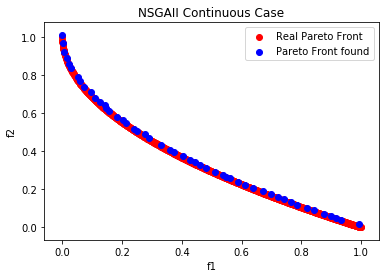

In [17]:
# Plot
juphelpers.plotFrontgraphics(np.array([benchmarks.zdt1(ind) for ind in NSGAII_solutions_continu.bestPop]),
                  np.array(optimal_front),
                  title = "NSGAII Continuous Case",xlabel="f1",ylabel="f2")

In [18]:
# Ajouter une solution à la liste de solutions
list_of_solutions_continu.append(NSGAII_solutions_continu)

In [19]:
# Sauvegarde des informations
if saveEnabled:
    juphelpers.GeneralCases.save_dict(dictionaireContinu, folderOfCSVs, CsvFileNameContinu)

##### 5.1.3.2 Cas discret

In [20]:
# Creating a solution handler
NSGAII_solutions_discret = juphelpers.bData.single_solution(methodName="NSGAII", function_name=name_of_function,
                                                   good_points=L_good, bad_points=L_bad,
                                                   number_of_runs=number_of_runs,
                                                   numberOfPersons=number_of_instances,
                                                   iters=max_numer_of_iterations,
                                                   refpointToHyperV=[11,11],
                                                   identif="NSGAII-Discret-ZDT1",
                                                   pareto_front=optimal_front,
                                                   obj=benchmarks.zdt1,
                                                   lb=0, ub=1,
                                                   dim=dim_of_labels)

In [21]:
# Creez envrironment (Toolbox, Stats, Logbook) pour le cas discret
envrironment = juphelpers.nsga2.create_Environment_For_NSGAII_Discrete_Case(X,
                                                           dim_of_labels,
                                                           (-1.0, -1.0),
                                                           benchmarks.zdt1,
                                                           random_labels=True,
                                                           seed = seed_for_all)

/home/galencarmedeiro/.local/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessCustom' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/galencarmedeiro/.local/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [22]:
for run in range(number_of_runs):
    envrironment_copy = copy.deepcopy(envrironment)
    # --------------------------------------------------------------------------------------------------

    # Obtenez une meilleure population et des statistiques
    start_time = time.time()
    # ==================================================================================================
    (pop_tot, logbook) = juphelpers.nsga2.NSGAII_Discrete_Case(envrironment_copy,
                                                       NGEN=max_numer_of_iterations, MU=number_of_instances,
                                                       CXPB=0.93, showprogress = False,
                                                       seed = run)
    # ==================================================================================================
    delta_time = time.time() - start_time
    
    # Getting good population by labels
    pop_tot.sort(key=lambda x: x.fitness.values)
    label_pop = pop_tot[::2]
    pop = [X[juphelpers.nsga2.binToInt(p)] for p in label_pop]
    
    # Add solution
    NSGAII_solutions_discret.add_one_run(pop,delta_time)

In [23]:
# Convergence et diversité
(t,c,d,h) = NSGAII_solutions_discret.returnMeanValues()

dictionaireDiscret.update({'Average time of execution (s)':str(t)})
dictionaireDiscret.update({'Average convergence':str(c), 'Average diversity':str(d),
                          'Average hypervolume':str(h)})

In [24]:
print("Time of execution (s): ",t)
print("Convergence: ",c)
print("Diversity: ",d)
print("hypervolume: ",h)

Time of execution (s):  1.9529078165690104
Convergence:  0.0007424333370297968
Diversity:  0.31456712280860905
hypervolume:  120.65446086258045


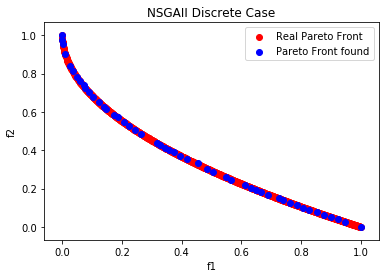

In [25]:
juphelpers.plotFrontgraphics(np.array([benchmarks.zdt1(ind) for ind in NSGAII_solutions_discret.bestPop]),
                  np.array(optimal_front),
                  title = "NSGAII Discrete Case",xlabel="f1",ylabel="f2")

In [26]:
# Ajouter une solution à la liste de solutions
list_of_solutions_discret.append(NSGAII_solutions_discret)

In [27]:
# Sauvegarde des informations
if saveEnabled:
    juphelpers.GeneralCases.save_dict(dictionaireDiscret, folderOfCSVs, CsvFileNameDiscret)

#### 5.1.4 Conclusion

> Nous pouvons observer une excellente performance pour le cas continu.

> Notre algorithme dans le cas binaire trouve toujours une grande convergence, mais la divergence peut parfois être mauvaise. Cela est dû au fait que certains éléments de la population sont identiques, ce qui augmente la valeur de la mesure. Cependant, nos éléments ne détectent pas parfaitement la courbe de Pareto d'origine, mais tous les points décrivent bien la courbe.

#### 5.1.5 Bibliographie
<a id='511NSG2'></a>
1. http://www.cleveralgorithms.com/nature-inspired/evolution/nsga.html

<a id='NSGA3'></a>
### 5.2 Non-dominated Sorting Genetic Algorithm III

#### 5.3.1 Introduction



[[1]](#NSGA3INTRO)NSGA-III est une méthode d’optimisation de Pareto qui fonctionne bien avec des problèmes ayant **plusieurs objectifs** (trois ou plus). La principale différence entre cet algorithme et NSGA-II réside dans le fait que NSGA-III utilise un **ensemble de points de référence pour maintenir la diversité des points de Pareto pendant la recherche.** Cela se traduit par une distribution très uniforme des points de Pareto dans l'espace des objectifs, même lorsque le nombre d'objectifs est grand.

**NSGA-II sur DTLZ2**
Image prise à partir de [[2]](#NSGA2DTLZ2IMAGE):
![NSGA2 DTLZ2 IMAGE](images/DTLZ2-solved-by-NSGA-II.png)

**NSGA-III sur DTLZ2**
Image prise à partir de [[3]](#NSGA3DTLZ2IMAGE):
![NSGA3 DTLZ2 IMAGE](images/DTLZ2-solved-by-NSGA-III.png)

#### 5.2.2 Méthodologie


**Pseudocode du NSGA-III**
Image prise à partir de [[4]](#NSGA3DTLZ2IMAGE):
![NSGA3 DTLZ2 IMAGE](images/NSGAIII-PSEUDO.png)

#### 5.2.3 Implémentation

In [28]:
# Dictionnaires pour sauvegarder les statistiques
dictionaireContinuNSGA3 = {'Methods':'NSGAIII', 'Data':'ZDT1', 'Number of runs':number_of_runs}
dictionaireDiscretNSGA3 = {'Methods':'NSGAIII', 'Data':'ZDT1', 'Number of runs':number_of_runs,
                      'Real points':L_good,
                     'Fake points':(L_bad)}

##### 5.2.3.1 Cas continu

In [29]:
# Creating a solution handler
NSGAIII_solutions_continu = juphelpers.bData.single_solution(methodName="NSGAII", function_name=name_of_function,
                                                   good_points=L_good, bad_points=L_bad,
                                                   number_of_runs=number_of_runs,
                                                   numberOfPersons=number_of_instances,
                                                   iters=max_numer_of_iterations,
                                                   refpointToHyperV=[11,11],
                                                   identif="NSGAII-Continu-ZDT1",
                                                   pareto_front=optimal_front,
                                                   obj=benchmarks.zdt1,
                                                   lb=0.0, ub=1.0,
                                                   dim=30)

In [30]:
# Creez envrironment (Toolbox, Stats, Logbook, ref_points) pour le cas continu
envrironment = juphelpers.nsga3.create_Environment_For_NSGAIII_Continuous_Case(0.0, 1.0, 30,
                                                 juphelpers.DataGenerator.uniform,benchmarks.zdt1,
                                                 (-1.0,-1.0),indpb=1/30,
                                                 P = number_of_instances//2)

In [31]:
for run in range(number_of_runs):
    envrironment_copy = copy.deepcopy(envrironment)
    # --------------------------------------------------------------------------------------------------

    # Obtenez une meilleure population et des statistiques
    start_time = time.time()
    # ==================================================================================================
    (pop_tot, stats) = juphelpers.nsga3.NSGAIII_Continuous_Case(envrironment_copy, NGEN=max_numer_of_iterations,
                                                               MU=number_of_instances, CXPB=0.93,
                                                               MUTPB=1.0,
                                                               seed=run,showprogress = False)
    # ==================================================================================================
    delta_time = time.time() - start_time
    
    pop_tot.sort(key=lambda x: x.fitness.values)
    pop = []
    # Getting pop as a list
    for p in pop_tot:
        pop.append(list(p))
    
    # Add solution
    NSGAIII_solutions_continu.add_one_run(pop,delta_time)

In [32]:
# Convergence et diversité
(t,c,d,h) = NSGAIII_solutions_continu.returnMeanValues()

dictionaireContinuNSGA3.update({'Average time of execution (s)':str(t)})
dictionaireContinuNSGA3.update({'Average convergence':str(c), 'Average diversity':str(d),
                          'Average hypervolume':str(h)})

In [33]:
print("Time of execution (s): ",t)
print("Convergence: ",c)
print("Diversity: ",d)
print("hypervolume: ",h)

Time of execution (s):  2.381214475631714
Convergence:  0.005567774983340092
Diversity:  0.8253271430064147
hypervolume:  120.49186463595535


In [34]:
# Ajouter une solution à la liste de solutions
list_of_solutions_continu.append(NSGAIII_solutions_continu)

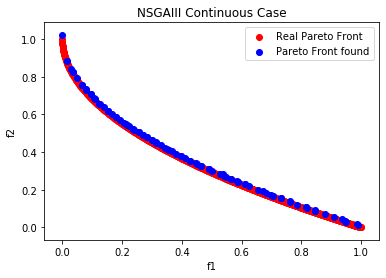

In [35]:
juphelpers.plotFrontgraphics(np.array([benchmarks.zdt1(ind) for ind in NSGAIII_solutions_continu.bestPop]),
                  np.array(optimal_front),
                  title = "NSGAIII Continuous Case",xlabel="f1",ylabel="f2")

In [36]:
# Sauvegarde des informations
if saveEnabled:
    juphelpers.GeneralCases.save_dict(dictionaireContinuNSGA3, folderOfCSVs, CsvFileNameContinu)

##### 5.2.3.2 Cas discret

In [37]:
# Creating a solution handler
NSGAIII_solutions_discret = juphelpers.bData.single_solution(methodName="NSGAIII", function_name=name_of_function,
                                                   good_points=L_good, bad_points=L_bad,
                                                   number_of_runs=number_of_runs,
                                                   numberOfPersons=number_of_instances,
                                                   iters=max_numer_of_iterations,
                                                   refpointToHyperV=[11,11],
                                                   identif="NSGAIII-Discret-ZDT1",
                                                   pareto_front=optimal_front,
                                                   obj=benchmarks.zdt1,
                                                   lb=0, ub=1,
                                                   dim=dim_of_labels)

In [38]:
# Creez envrironment (Toolbox, Stats, Logbook) pour le cas discret
envrironment = juphelpers.nsga3.create_Environment_For_NSGAIII_Discrete_Case(X,
                                                       dim_of_labels,
                                                       (-1.0, -1.0),
                                                       benchmarks.zdt1,
                                                       random_labels=True,
                                                       seed = seed_for_all,
                                                       P=number_of_instances)

In [39]:
for run in range(number_of_runs):
    envrironment_copy = copy.deepcopy(envrironment)
    # --------------------------------------------------------------------------------------------------

    # Obtenez une meilleure population et des statistiques
    start_time = time.time()
    # ==================================================================================================
    (pop_tot, stats) = juphelpers.nsga3.NSGAIII_Discrete_Case(envrironment_copy, NGEN=max_numer_of_iterations,
                                                               MU=number_of_instances, CXPB=0.93,
                                                               MUTPB=1.0,
                                                               seed=run,showprogress = False)
    # ==================================================================================================
    delta_time = time.time() - start_time
    
    # Getting good population by labels
    pop_tot.sort(key=lambda x: x.fitness.values)
    label_pop = pop_tot[::2]
    pop = [X[juphelpers.nsga3.binToInt(p)] for p in label_pop]
    
    # Add solution
    NSGAIII_solutions_discret.add_one_run(pop,delta_time)

In [40]:
# Convergence et diversité
(t,c,d,h) = NSGAIII_solutions_discret.returnMeanValues()

dictionaireDiscretNSGA3.update({'Average time of execution (s)':str(t)})
dictionaireDiscretNSGA3.update({'Average convergence':str(c), 'Average diversity':str(d),
                          'Average hypervolume':str(h)})

In [41]:
print("Time of execution (s): ",t)
print("Convergence: ",c)
print("Diversity: ",d)
print("hypervolume: ",h)

Time of execution (s):  2.2648125092188516
Convergence:  0.0009524588504648035
Diversity:  0.41392209609328406
hypervolume:  120.60262666926226


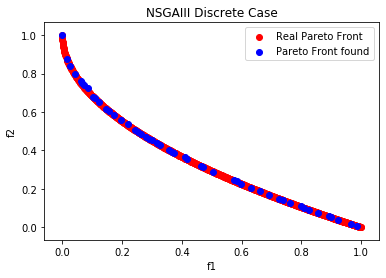

In [42]:
juphelpers.plotFrontgraphics(np.array([benchmarks.zdt1(ind) for ind in NSGAIII_solutions_discret.bestPop]),
                  np.array(optimal_front),
                  title = "NSGAIII Discrete Case",xlabel="f1",ylabel="f2")

In [43]:
# Ajouter une solution à la liste de solutions
list_of_solutions_discret.append(NSGAIII_solutions_discret)

In [44]:
# Sauvegarde des informations
if saveEnabled:
    juphelpers.GeneralCases.save_dict(dictionaireDiscretNSGA3, folderOfCSVs, CsvFileNameDiscret)

#### 5.2.4 Conclusion


Notez que l'algorithme donne de bons résultats, mais NASGAII semble représenter le meilleur front de pareto de zdt1. Cependant, nous pouvons voir, selon les images d’introduction, que la NSGAIII a de meilleures performances sur des fronts de Pareto plus complexes sur des espaces de sortie plus grands.

#### 5.2.5 Bibliographie

<a id='NSGA3INTRO'></a>
1. http://www.redcedartech.com/docs/HEEDSMDO/Study_Tab/Parameter_Optimization_Projects/NAGAIII.htm
<a id='NSGA2DTLZ2IMAGE'></a>
2. https://www.researchgate.net/figure/DTLZ2-solved-by-NSGA-II_fig1_258386891
<a id='NSGA3DTLZ2IMAGE'></a>
3. https://www.cogentoa.com/article/10.1080/23311916.2016.1269383.pdf 
<a id='NSGA3PSEUDO'></a>
4. https://www.researchgate.net/figure/Pseudocode-of-NSGA-III-main-procedure_fig12_265552713

<a id='SPEA2'></a>
### 5.3 SPEA2: Improving the Strength Pareto Evolutionary Algorithm

#### 5.3.1 Introduction

[[1]](#531SPEA2Paper)SPEA2 est un autre algorithme génétique multi-objectif, mais celui-ci a tenté d'éliminer les faiblesses potentielles de son prédécesseur (SPEA) et d'intégrer les résultats les plus récents afin de concevoir un algorithme EMO (evolutionary multiobjective optimization) puissant et actualisé. Les principales différences entre SPEA2 et SPEA sont les suivantes:

1. Un schéma d’affectation de la forme physique amélioré est utilisé, qui prend en compte le nombre d’individus qu’il domine et par lequel il domine.
2. Une technique d'estimation de la densité du plus proche voisin est incorporée, ce qui permet un guidage plus précis du processus de recherche.
3. Une nouvelle méthode de troncature des archives garantit la préservation des solutions aux limites.  


#### 5.3.2 Méthodologie
![PseudocodeSPEA2](images/spea2pseudocode.png)

#### 5.3.3 Implémentation

In [45]:
# Dictionnaires pour sauvegarder les statistiques
dictionaireContinuSPEA2 = {'Methods':'SPEA2', 'Data':'ZDT1', 'Number of runs':number_of_runs}
dictionaireDiscretSPEA2 = {'Methods':'SPEA2', 'Data':'ZDT1', 'Number of runs':number_of_runs,
                      'Real points':L_good,
                     'Fake points':(L_bad)}

##### 5.3.3.1 Cas continu

In [46]:
# Creating a solution handler
SPEA2_solutions_continu = juphelpers.bData.single_solution(methodName="SPEA2", function_name=name_of_function,
                                                   good_points=L_good, bad_points=L_bad,
                                                   number_of_runs=number_of_runs,
                                                   numberOfPersons=number_of_instances,
                                                   iters=max_numer_of_iterations,
                                                   refpointToHyperV=[11,11],
                                                   identif="SPEA2-Continu-ZDT1",
                                                   pareto_front=optimal_front,
                                                   obj=benchmarks.zdt1,
                                                   lb=0.0, ub=1.0,
                                                   dim=30)

In [47]:
# Creez envrironment (Toolbox, Stats, Logbook) pour le cas continu
envrironment = juphelpers.spea2.create_Environment_For_SPEA2_Continuous_Case(0.0,
                                                            1.0, 30,
                                                            juphelpers.DataGenerator.uniform,
                                                            benchmarks.zdt1,
                                                            weights=(-1.0,-1.0),
                                                            eta = 20.0, indpb=1/30)

In [48]:
for run in range(number_of_runs):
    envrironment_copy = copy.deepcopy(envrironment)
    # --------------------------------------------------------------------------------------------------

    # Obtenez une meilleure population et des statistiques
    start_time = time.time()
    # ==================================================================================================
    (pop_tot, stats) = juphelpers.spea2.SPEA2_Continuous_Case(envrironment_copy, NGEN=max_numer_of_iterations,
                                                             MU=number_of_instances,CXPB=0.93,
                                                             seed=run,
                                                             showprogress=False)
    # ==================================================================================================
    delta_time = time.time() - start_time
    
    pop_tot.sort(key=lambda x: x.fitness.values)
    pop = []
    # Getting pop as a list
    for p in pop_tot:
        pop.append(list(p))
    
    # Add solution
    SPEA2_solutions_continu.add_one_run(pop,delta_time)

In [49]:
# Convergence et diversité
(t,c,d,h) = SPEA2_solutions_continu.returnMeanValues()

dictionaireContinuSPEA2.update({'Average time of execution (s)':str(t)})
dictionaireContinuSPEA2.update({'Average convergence':str(c), 'Average diversity':str(d),
                          'Average hypervolume':str(h)})

In [50]:
print("Time of execution (s): ",t)
print("Convergence: ",c)
print("Diversity: ",d)
print("hypervolume: ",h)

Time of execution (s):  9.442922027905782
Convergence:  0.07392714668078584
Diversity:  0.9962015467406612
hypervolume:  113.51329661476274


In [51]:
# Ajouter une solution à la liste de solutions
list_of_solutions_continu.append(SPEA2_solutions_continu)

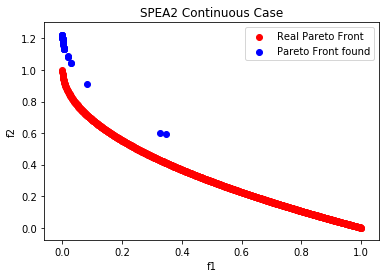

In [52]:
juphelpers.plotFrontgraphics(np.array([benchmarks.zdt1(ind) for ind in SPEA2_solutions_continu.bestPop]),
                  np.array(optimal_front),
                  title = "SPEA2 Continuous Case",xlabel="f1",ylabel="f2")

In [53]:
# Sauvegarde des informations
if saveEnabled:
    juphelpers.GeneralCases.save_dict(dictionaireContinuSPEA2, folderOfCSVs, CsvFileNameContinu)

##### 5.3.3.2 Cas discret

In [54]:
# Creating a solution handler
SPEA2_solutions_discret = juphelpers.bData.single_solution(methodName="SPEA2", function_name=name_of_function,
                                                   good_points=L_good, bad_points=L_bad,
                                                   number_of_runs=number_of_runs,
                                                   numberOfPersons=number_of_instances,
                                                   iters=max_numer_of_iterations,
                                                   refpointToHyperV=[11,11],
                                                   identif="SPEA2-Discret-ZDT1",
                                                   pareto_front=optimal_front,
                                                   obj=benchmarks.zdt1,
                                                   lb=0, ub=1,
                                                   dim=dim_of_labels)

In [55]:
# Creez envrironment (Toolbox, Stats, Logbook) pour le cas discret
envrironment = juphelpers.spea2.create_Environment_For_SPEA2_Discrete_Case(X,
                                                           dim_of_labels,
                                                           (-1.0, -1.0),
                                                           benchmarks.zdt1,
                                                           random_labels=True,
                                                           seed=seed_for_all)

In [56]:
for run in range(number_of_runs):
    envrironment_copy = copy.deepcopy(envrironment)
    # --------------------------------------------------------------------------------------------------

    # Obtenez une meilleure population et des statistiques
    start_time = time.time()
    # ==================================================================================================
    (pop_tot, logbook) = juphelpers.spea2.SPEA2_Discrete_Case(envrironment_copy,
                                               NGEN=max_numer_of_iterations, MU=number_of_instances,
                                               CXPB=0.93, seed=run,
                                               showprogress = False)
    # ==================================================================================================
    delta_time = time.time() - start_time
    
    # Getting good population by labels
    pop = [X[juphelpers.nsga2.binToInt(p)] for p in pop_tot]
    
    # Add solution
    SPEA2_solutions_discret.add_one_run(pop,delta_time)

In [57]:
# Convergence et diversité
(t,c,d,h) = SPEA2_solutions_discret.returnMeanValues()

dictionaireDiscretSPEA2.update({'Average time of execution (s)':str(t)})
dictionaireDiscretSPEA2.update({'Average convergence':str(c), 'Average diversity':str(d),
                          'Average hypervolume':str(h)})

In [58]:
print("Time of execution (s): ",t)
print("Convergence: ",c)
print("Diversity: ",d)
print("hypervolume: ",h)

Time of execution (s):  84.98475139935812
Convergence:  0.001251840305013012
Diversity:  0.15231476772757768
hypervolume:  120.652560131747


In [59]:
# Ajouter une solution à la liste de solutions
list_of_solutions_discret.append(SPEA2_solutions_discret)

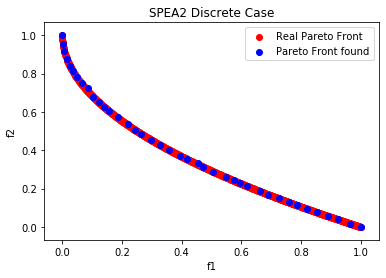

In [60]:
juphelpers.plotFrontgraphics(np.array([benchmarks.zdt1(ind) for ind in SPEA2_solutions_discret.bestPop]),
                  np.array(optimal_front),
                  title = "SPEA2 Discrete Case",xlabel="f1",ylabel="f2")

In [61]:
# Sauvegarde des informations
if saveEnabled:
    juphelpers.GeneralCases.save_dict(dictionaireDiscretSPEA2, folderOfCSVs, CsvFileNameDiscret)

#### 5.3.4 Conclusion

> La SPEA2 dans le cas continu n’a pas eu une bonne performance par rapport à la NSGAII. Ceci est observé par le nombre d'itérations, la population et la façon dont les points ont été instanciés. Ce fait peut être facilement confirmé en augmentant le nombre d'itérations (SPEA2 met plus de temps à converger que NSGAII, mais présente une meilleure divergence).

> Le SPEA2 a donné d’excellents résultats pour le cas discret. Cependant, bien qu’il ait la meilleure diversité, plusieurs points de la courbe de Pareto n’ont pas été trouvés. Dans un problème où nous voulons tous les points de la courbe de Pareto et ne trouvons pas quelques points qui la décrivent le mieux, NSGAII est plus adéquat.

#### 5.3.5 Bibliographie

<a id='531SPEA2Paper'></a>
1. https://pdfs.semanticscholar.org/6672/8d01f9ebd0446ab346a855a44d2b138fd82d.pdf

<a id='NSGSA'></a>
### 5.4 Non-dominated Sorting Gravitational Search

#### 5.4.1 Introduction

Le **Non-dominated Sorting Gravitational Search (NSGSA)** utilise le concept de _tri non dominé_ pour mettre à jour l'accélération gravitationnelle des particules. Des **archives externes** sont également utilisées pour stocker les solutions optimales de Pareto et fournir un peu _d’élitisme_. Il oriente également les recherches vers les régions non encombrées et les régions extrêmes du **front de Pareto**. Enfin, un nouveau critère est proposé pour mettre à jour les archives externes. [[1]](#MOGSAWITHPSEUDO)

#### 5.4.2 Méthodologie

Image prise à partir de [[1]](#MOGSAWITHPSEUDO):
![PseudocodeNSGSA](images/PseudoNSGSA.png)

#### 5.4.3 Implémentation

In [62]:
# Dictionnaires pour sauvegarder les statistiques
dictionaireMOGSAContinu = {'Methods':'MOGSA', 'Data':'ZDT1', 'Number of runs':number_of_runs}
dictionaireMOGSADiscret = {'Methods':'MOGSA', 'Data':'ZDT1', 'Number of runs':number_of_runs,
                      'Real points':L_good,
                     'Fake points':(L_bad)}

##### 5.4.3.1 Cas continu

In [63]:
# Creating a solution handler
MOGSA_solutions_continu = juphelpers.bData.single_solution(methodName="MOGSA", function_name=name_of_function,
                                                   good_points=L_good, bad_points=L_bad,
                                                   number_of_runs=number_of_runs,
                                                   numberOfPersons=number_of_instances,
                                                   iters=max_numer_of_iterations,
                                                   refpointToHyperV=[11,11],
                                                   identif="MOGSA-Continu-ZDT1",
                                                   pareto_front=optimal_front,
                                                   obj=benchmarks.zdt1,
                                                   lb=0.0, ub=1.0,
                                                   dim=30)

In [64]:
for run in range(number_of_runs):

    # Obtenez une meilleure population et des statistiques
    # ==================================================================================================
    sol = juphelpers.mogsa.Continuous_MOGSA(benchmarks.zdt1,lb=0.,ub=1.,dim=30,
                                        PopSize=number_of_instances,iters=max_numer_of_iterations,
                                        weights=(-1,-1),
                                        n_archive=number_of_instances, ps_m=0.002, pr_m=0.001,
                                        showprogress=False,
                                        randomseed = run)
    # ==================================================================================================
    
    # Getting good population
    pop = [ind.pos for ind in sol.archive]
    
    # Add solution
    MOGSA_solutions_continu.add_one_run(pop,sol.executionTime)

In [65]:
# Convergence et diversité
(t,c,d,h) = MOGSA_solutions_continu.returnMeanValues()

dictionaireMOGSAContinu.update({'Average time of execution (s)':str(t)})
dictionaireMOGSAContinu.update({'Average convergence':str(c), 'Average diversity':str(d),
                          'Average hypervolume':str(h)})

In [66]:
print("Time of execution (s): ",t)
print("Convergence: ",c)
print("Diversity: ",d)
print("hypervolume: ",h)

Time of execution (s):  137.7234555006027
Convergence:  0.0007618347688072992
Diversity:  0.4196526791153055
hypervolume:  120.61975893960933


In [67]:
# Ajouter une solution à la liste de solutions
list_of_solutions_continu.append(MOGSA_solutions_continu)

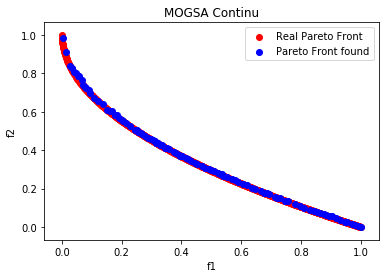

In [68]:
# Plot
juphelpers.plotFrontgraphics(np.array([benchmarks.zdt1(ind) for ind in MOGSA_solutions_continu.bestPop]),
                             np.array(optimal_front),
                             title = "MOGSA Continu",
                             xlabel="f1",ylabel="f2")

In [69]:
# Sauvegarde des informations
if saveEnabled:
    juphelpers.GeneralCases.save_dict(dictionaireMOGSAContinu, folderOfCSVs, CsvFileNameContinu)

##### 5.4.3.2 Cas discret

In [70]:
# Creating a solution handler
MOGSA_solutions_discret = juphelpers.bData.single_solution(methodName="MOGSA",
                                                   function_name=name_of_function,
                                                   good_points=L_good, bad_points=L_bad,
                                                   number_of_runs=number_of_runs,
                                                   numberOfPersons=number_of_instances,
                                                   iters=max_numer_of_iterations,
                                                   refpointToHyperV=[11,11],
                                                   identif="MOGSA-Discret-ZDT1",
                                                   pareto_front=optimal_front,
                                                   obj=benchmarks.zdt1,
                                                   lb=0, ub=1,
                                                   dim=dim_of_labels)

In [71]:
# Mettre la fonction de faisabilité au bon format
(feasibility, multiObj) = juphelpers.mogsa.createEnvironment(benchmarks.zdt1, X)

In [72]:
for run in range(number_of_runs):
    
    # Obtenez une meilleure population et des statistiques
    start_time = time.time()
    # ==================================================================================================
    sol = juphelpers.mogsa.Binary_MOGSA(multiObj,feasibility,dim_of_labels,PopSize=number_of_instances,
                  iters=max_numer_of_iterations,
                  weights=(-1,-1),n_archive=number_of_instances,ps_m=0.1, pr_m=0.5/(2*number_of_instances),
                  flipProb=0.1/(2*number_of_instances),
                  showprogress=False,
                randomseed = run)
    # ==================================================================================================
    delta_time = time.time() - start_time
    
    # Getting good population by labels
    pop = [X[juphelpers.nsga2.binToInt(p.pos)] for p in sol.archive]
    
    # Add solution
    MOGSA_solutions_discret.add_one_run(pop,sol.executionTime)

In [73]:
# Convergence et diversité
(t,c,d,h) = MOGSA_solutions_discret.returnMeanValues()

dictionaireMOGSADiscret.update({'Average time of execution (s)':str(t)})
dictionaireMOGSADiscret.update({'Average convergence':str(c), 'Average diversity':str(d),
                          'Average hypervolume':str(h)})

In [74]:
print("Time of execution (s): ",t)
print("Convergence: ",c)
print("Diversity: ",d)
print("hypervolume: ",h)

Time of execution (s):  307.0904999653498
Convergence:  0.0010412830929134725
Diversity:  0.33146670518179094
hypervolume:  120.6592828441508


In [75]:
# Ajouter une solution à la liste de solutions
list_of_solutions_discret.append(MOGSA_solutions_discret)

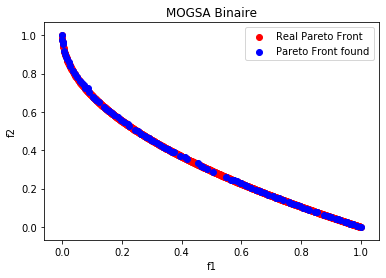

In [76]:
# Plot
juphelpers.plotFrontgraphics(np.array([benchmarks.zdt1(ind) for ind in MOGSA_solutions_discret.bestPop]),
                             np.array(optimal_front),
                             title = "MOGSA Binaire",
                             xlabel="f1",ylabel="f2")

In [77]:
# Sauvegarde des informations
if saveEnabled:
    juphelpers.GeneralCases.save_dict(dictionaireMOGSADiscret, folderOfCSVs, CsvFileNameDiscret)

##### 5.4.4 Conclusion

Lors de la réalisation de la construction de l’algorithme, on peut voir que c’est une méthode où les choix des paramètres peuvent grandement influencer la convergence, et s’il n’y a pas d’attention, l’algorithme peut tomber à un endroit optimal et y rester longtemps, car le seul moyen de sortir de cet endroit serait par mutations.

En tout cas, c’est une méthode intéressante (par rapport à la méthodologie), qui pour le cas continu, avec une bonne régulation des paramètres, il est possible d’obtenir de bons résultats, mais le cas discret n’a pas encore été exploré, les expériences réalisées ici étant un mélange de GSA binaire et le MOGSA original plus l’ajout d’un opérateur de mutation. C'est donc toujours un domaine à explorer, mais vous pouvez déjà obtenir de très bons résultats.

#### 5.4.5 Bibliographie

<a id='MOGSAWITHPSEUDO'></a>
1. https://www.researchgate.net/publication/303184329_A_Multi_objective_gravitational_search_algorithm_based_on_non-dominated_sorting
<a id='MOGSASurvey'></a>
2. https://www.sciencedirect.com/science/article/pii/S2210650217303577
<a id='MOGSADisruption'></a>
3. https://core.ac.uk/download/pdf/82093137.pdf
<a id='OnlyGSA'></a>
4. https://www.sciencedirect.com/science/article/pii/S0020025509001200
<a id='GSACode'></a>
5. https://github.com/himanshuRepo/Gravitational-Search-Algorithm

<a id='SimpleCullAlgorithm'></a>
### 5.5 Simple Cull Algorithm

#### 5.5.1 Introduction

Simple Cull (SC) est un algorithme simple pour trouver le pareto front en tant qu'algorithme de boucle imbriquée par bloc. [[1]](#521SIMPLECULL)

#### 5.5.2 Méthodologie

Il examine les configurations une par une et maintient un ensemble $ C_{min} $ de points de Pareto parmi les points observés jusqu'à présent. Chaque fois qu'un nouveau point est inspecté, deux situations peuvent se produire:
1. Si le point est dominé par un ou plusieurs des points Pareto existants dans $ C_{min} $, il est ignoré.
2. Si le point n'est pas dominé dans $ C_{min} $, tous les points de $ C_{min} $ dominés par le nouveau point sont supprimés et le nouveau point est ajouté à $ C_{min} $.

#### 5.5.3 Implémentation

In [78]:
# Dictionnaires pour sauvegarder les statistiques
dictionaireDiscretSC = {'Methods':'Simple Cull', 'Data':'ZDT1', 'Number of runs':number_of_runs,
                      'Real points':L_good,
                     'Fake points':(L_bad)}

In [79]:
# Creating a solution handler
Simple_Cull_solutions_discret = juphelpers.bData.single_solution(methodName="Simple Cull",
                                                   function_name=name_of_function,
                                                   good_points=L_good, bad_points=L_bad,
                                                   number_of_runs=number_of_runs,
                                                   numberOfPersons=number_of_instances,
                                                   iters=max_numer_of_iterations,
                                                   refpointToHyperV=[11,11],
                                                   identif="Simple-Cull-Discret-ZDT1",
                                                   pareto_front=optimal_front,
                                                   obj=benchmarks.zdt1,
                                                   lb=0, ub=1,
                                                   dim=dim_of_labels)

In [80]:
for run in range(number_of_runs):
    # Obtenez une meilleure population et des statistiques
    start_time = time.time()
    # ==================================================================================================
    paretoPoints, dominatedPoints = juphelpers.sCull.simple_cull(X, benchmarks.zdt1, (1.0,1.0))
    # ==================================================================================================
    delta_time = time.time() - start_time
    
    # Add solution
    Simple_Cull_solutions_discret.add_one_run(paretoPoints,delta_time)

In [81]:
# Convergence et diversité
(t,c,d,h) = Simple_Cull_solutions_discret.returnMeanValues()

dictionaireDiscretSC.update({'Average time of execution (s)':str(t)})
dictionaireDiscretSC.update({'Average convergence':str(c), 'Average diversity':str(d),
                          'Average hypervolume':str(h)})

In [82]:
print("Time of execution (s): ",t)
print("Convergence: ",c)
print("Diversity: ",d)
print("hypervolume: ",h)

Time of execution (s):  0.0395235538482666
Convergence:  0.0010412830929134725
Diversity:  0.33146670518179094
hypervolume:  120.6592828441508


In [83]:
# Ajouter une solution à la liste de solutions
list_of_solutions_discret.append(Simple_Cull_solutions_discret)

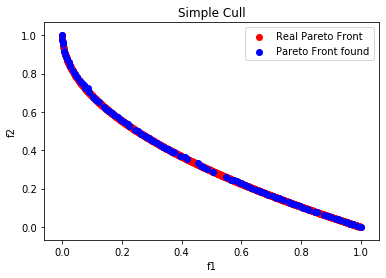

In [84]:
juphelpers.plotFrontgraphics(np.array([benchmarks.zdt1(ind) for ind in Simple_Cull_solutions_discret.bestPop]),
                             np.array(optimal_front),
                             title = "Simple Cull",
                             xlabel="f1",ylabel="f2")

In [85]:
# Sauvegarde des informations
if saveEnabled:
    juphelpers.GeneralCases.save_dict(dictionaireDiscretSC, folderOfCSVs, CsvFileNameDiscret)

#### 5.5.4 Conclusion

> C’est une méthode facile à comprendre, facile à mettre en oeuvre et d’excellents résultats, mais en raison de la complexité de $ O(N^2*o) $ (o est la dimension de la sortie), l’algorithme commencera rapidement à augmenter le temps d’exécution car il dispose de plus de points, et pour les algorithmes génétiques, l’outil easena facilite l’arrêt en rendant l’algorithme génétique probablement plus rapide que l’abattage simple pour de nombreux points.

#### 5.5.5 Bibliographie

<a id='521SIMPLECULL'></a>
1. http://www.es.ele.tue.nl/pareto/papers/date2007_paretocalculator_final.pdf

<a id='PSA'></a>
### 5.6 Pareto Simulated Annealing

#### 5.6.1 Introduction

[[3]](#PSAWiki)C'est une méta-heuristique multi-optimisation qui consiste en une technique de recherche locale stochastique basée sur les principes de la thermodynamique (recuit ou annealing) qui consiste en un mélange de chauffage (explorer) et de refroidissement (exploiter).

#### 5.6.2 Méthodologie
Image prise à partir de [[1]](#ParetoAntColonyToAnnealing):
![PseudocodePSA1](images/PSA1.png)
![PseudocodePSA2](images/PSA2.png)

#### 5.6.3 Implémentation

In [86]:
# Dictionnaires pour sauvegarder les statistiques
dictionaireDiscretPSA = {'Methods':'PSA', 'Data':'ZDT1', 'Number of runs':number_of_runs,
                      'Real points':L_good,
                     'Fake points':(L_bad)}

In [87]:
# Creating a solution handler
PSA_solutions_discret = juphelpers.bData.single_solution(methodName="PSA",
                                                   function_name=name_of_function,
                                                   good_points=L_good, bad_points=L_bad,
                                                   number_of_runs=number_of_runs,
                                                   numberOfPersons=number_of_instances,
                                                   iters=max_numer_of_iterations,
                                                   refpointToHyperV=[11,11],
                                                   identif="PSA-Discret-ZDT1",
                                                   pareto_front=optimal_front,
                                                   obj=benchmarks.zdt1,
                                                   lb=0, ub=1,
                                                   dim=dim_of_labels)

In [88]:
(feasibility, multiObj) = juphelpers.psa.createEnvironment(benchmarks.zdt1, X)

In [89]:
for run in range(number_of_runs):
    
    # Obtenez une meilleure population et des statistiques
    # ==================================================================================================
    sol = juphelpers.psa.PSA(multiObj, (-1,-1),feasibility, 
        X,2,
        s=number_of_instances, iters=max_numer_of_iterations,
        bit_flip=2,prob_bitflip=0.5,
        showprogress = False)
    # ==================================================================================================
    
    # Getting good population by labels
    pop = [X[juphelpers.nsga2.binToInt(p)] for p in sol.pop]
    
    # Add solution
    PSA_solutions_discret.add_one_run(pop,sol.executionTime)

In [90]:
# Convergence et diversité
(t,c,d,h) = PSA_solutions_discret.returnMeanValues()

dictionaireDiscretPSA.update({'Average time of execution (s)':str(t)})
dictionaireDiscretPSA.update({'Average convergence':str(c), 'Average diversity':str(d),
                          'Average hypervolume':str(h)})

In [91]:
print("Time of execution (s): ",t)
print("Convergence: ",c)
print("Diversity: ",d)
print("hypervolume: ",h)

Time of execution (s):  5.370068669319153
Convergence:  0.0010393807567409875
Diversity:  0.37772139694691287
hypervolume:  120.60646317249522


In [92]:
# Ajouter une solution à la liste de solutions
list_of_solutions_discret.append(PSA_solutions_discret)

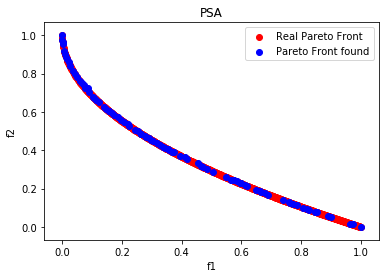

In [93]:
juphelpers.plotFrontgraphics(np.array([benchmarks.zdt1(ind) for ind in PSA_solutions_discret.bestPop]),
                             np.array(optimal_front),
                  title = "PSA",xlabel="f1",ylabel="f2")

In [94]:
# Sauvegarde des informations
if saveEnabled:
    juphelpers.GeneralCases.save_dict(dictionaireDiscretPSA, folderOfCSVs, CsvFileNameDiscret)

#### 5.6.4 Conclusion

C'est une méthode dont le choix des points stochastiques est fondamental. L'algorithme a été exécuté plusieurs fois, obtenant des résultats variés mais proches (même ordre de grandeur).  

C'est un modèle qui recherche principalement la convergence, tout en obtenant une convergence et une divergence optimales. Afin d’obtenir des résultats meilleurs et plus cohérents, il est nécessaire de modifier les paramètres en valeurs susceptibles d’augmenter le temps d’exécution, mais il convient de noter que l’algorithme acquiert d’excellents résultats même avec peu de populations et un faible nombre d’itérations.

#### 5.6.5 Bibliographie

<a id='ParetoAntColonyToAnnealing'></a>
1. https://www.researchgate.net/publication/220462163_Pareto_Ant_Colony_Optimization_A_Metaheuristic_Approach_to_Multiobjective_Portfolio_Selection
<a id='PSAnnealing'></a>
2. https://pdfs.semanticscholar.org/3129/67df379edc8d315b407c97aa8f5da64617f9.pdf
<a id='PSAWiki'></a>
3. https://pt.wikipedia.org/wiki/Simulated_annealing

<a id='Tabu'></a>
### 5.7 Binary Multi-Objective Tabu Search

#### 5.7.1 Introduction

C'est une méthode basée sur l'interdiction (temporaire ou non) des mouvements. L'optimum global peut être trouvé avec une série de séquences de mouvement autorisées. Chaque mouvement sera atteint sur une table Tabou pour voir si cela est autorisé ou non.[[1]](#RandomParetoTabu)

#### 5.7.2 Méthodologie
Image prise à partir de [[1]](#RandomParetoTabu):
![TabuPseudo](images/TabuPseudo.png)

#### 5.7.3 Implémentation

In [95]:
# Dictionnaires pour sauvegarder les statistiques
dictionaireDiscretBTabuSearch = {'Methods':'BinaryTabuSearch', 'Data':'ZDT1', 'Number of runs':number_of_runs,
                      'Real points':L_good,
                     'Fake points':(L_bad)}

In [96]:
# Creating a solution handler
bTabu_solutions_discret = juphelpers.bData.single_solution(methodName="Binary Tabu Search",
                                                   function_name=name_of_function,
                                                   good_points=L_good, bad_points=L_bad,
                                                   number_of_runs=number_of_runs,
                                                   numberOfPersons=number_of_instances,
                                                   iters=max_numer_of_iterations,
                                                   refpointToHyperV=[11,11],
                                                   identif="Binary-Tabu-Search-Discret-ZDT1",
                                                   pareto_front=optimal_front,
                                                   obj=benchmarks.zdt1,
                                                   lb=0, ub=1,
                                                   dim=dim_of_labels)

In [97]:
for run in range(number_of_runs):
    
    # Obtenez une meilleure population et des statistiques
    start_time = time.time()
    # ==================================================================================================
    pop = juphelpers.bTabuSearch.binary_pareto_tabu_search(benchmarks.zdt1,(-1,-1),X)
    # ==================================================================================================
    delta_time = time.time() - start_time
    
    # Add solution
    bTabu_solutions_discret.add_one_run(pop,delta_time)

In [98]:
# Convergence et diversité
(t,c,d,h) = bTabu_solutions_discret.returnMeanValues()

dictionaireDiscretBTabuSearch.update({'Average time of execution (s)':str(t)})
dictionaireDiscretBTabuSearch.update({'Average convergence':str(c), 'Average diversity':str(d),
                          'Average hypervolume':str(h)})

In [99]:
print("Time of execution: ",t)
print("Convergence: ",c)
print("Diversity: ",d)
print("hypervolume: ",h)

Time of execution:  0.10279502073923746
Convergence:  0.0010370385041511899
Diversity:  0.34028771010221187
hypervolume:  120.6592828441508


In [100]:
# Ajouter une solution à la liste de solutions
list_of_solutions_discret.append(bTabu_solutions_discret)

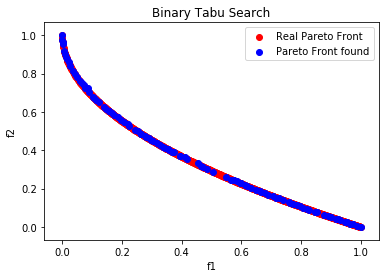

In [101]:
juphelpers.plotFrontgraphics(np.array([benchmarks.zdt1(ind) for ind in bTabu_solutions_discret.bestPop]),
                             np.array(optimal_front),
                  title = "Binary Tabu Search",xlabel="f1",ylabel="f2")

In [102]:
# Sauvegarde des informations
if saveEnabled:
    juphelpers.GeneralCases.save_dict(dictionaireDiscretBTabuSearch, folderOfCSVs, CsvFileNameDiscret)

#### 5.7.4 Conclusion

Comme nous pouvons le constater, Binary Tabu Search donne de bons résultats, car le choix du critère de l'étape de Binary Tabu Search compare le nouveau point qui viendra avec ceux déjà présents dans l'ensemble non dominé, de même que Simple Cull. Le complexidate des deux algorithmes dépend donc du nombre de points d’entrée et de la dimension de la sortie.

#### 5.7.5 Bibliographie

<a id='RandomParetoTabu'></a>
1. https://www.researchgate.net/publication/221477675_Randomized_Algorithm_with_Tabu_Search_for_Multi-Objective_Optimization_of_Large_Containership_Stowage_Plans

<a id='FullNSR'></a>
### 5.8. Full Non-dominated Sorting and Ranking

#### 5.8.1 Introduction

Cet algorithme a été appliqué dans NSGAII et NSGAIII, mais nous l’appliquons ici dans l’ensemble des données et pas seulement avec une petite population. Certains changements ont été apportés par rapport au code, mais le but est le même: classer différents fronts non dominés.

Pour améliorer le résultat, il est possible d'effectuer un retrait en utilisant la distance d'encombrement (crowding distance) afin de supprimer intelligemment les points du front de Pareto afin d'avoir moins de points, mais qui expriment très bien le front(La procédure peut être trouvée dans [[2]](#mogsacrowdingdistance)).

#### 5.8.2 Méthodologie

Image prise à partir de [[1]](#fullnsrpseudo):
![nondominatedpseudo](images/nondominatedpseudo.png)

#### 5.8.3 Implémentation

In [103]:
# Dictionnaires pour sauvegarder les statistiques
dictionaireDiscretFnsr = {'Methods':'FullNonDominatedSortingAndRanking', 'Data':'ZDT1',
                                 'Number of runs':number_of_runs,
                      'Real points':L_good,
                     'Fake points':(L_bad)}

In [104]:
# Creating a solution handler
fnsr_solutions_discret = juphelpers.bData.single_solution(methodName="Full Non-Dominated Sorting and Ranking",
                                                   function_name=name_of_function,
                                                   good_points=L_good, bad_points=L_bad,
                                                   number_of_runs=number_of_runs,
                                                   numberOfPersons=number_of_instances,
                                                   iters=max_numer_of_iterations,
                                                   refpointToHyperV=[11,11],
                                                   identif="FullNonDominatedSortingAndRanking-Discret-ZDT1",
                                                   pareto_front=optimal_front,
                                                   obj=benchmarks.zdt1,
                                                   lb=0, ub=1,
                                                   dim=dim_of_labels)

In [105]:
for run in range(number_of_runs):
    
    # Obtenez une meilleure population et des statistiques
    start_time = time.time()
    # ==================================================================================================
    dict_pop = juphelpers.fullnsr.fnon_dominated_sorting_and_ranking(X,benchmarks.zdt1,(-1,-1))
    # ==================================================================================================
    delta_time = time.time() - start_time
    pop = [X[p] for p in dict_pop[1]]
    
    # Add solution
    fnsr_solutions_discret.add_one_run(juphelpers.fullnsr.smart_removal(pop,100-run,benchmarks.zdt1,(-1,-1)),delta_time)

In [106]:
# Convergence et diversité
(t,c,d,h) = fnsr_solutions_discret.returnMeanValues()

dictionaireDiscretFnsr.update({'Average time of execution (s)':str(t)})
dictionaireDiscretFnsr.update({'Average convergence':str(c), 'Average diversity':str(d),
                          'Average hypervolume':str(h)})

In [107]:
print("Time of execution: ",t)
print("Convergence: ",c)
print("Diversity: ",d)
print("hypervolume: ",h)

Time of execution:  0.38057647546132406
Convergence:  0.0010063314377735612
Diversity:  0.2950789059634809
hypervolume:  120.65875198366582


In [108]:
# Ajouter une solution à la liste de solutions
list_of_solutions_discret.append(fnsr_solutions_discret)

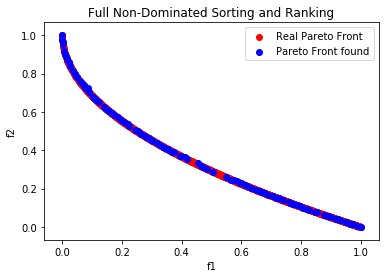

In [109]:
juphelpers.plotFrontgraphics(np.array([benchmarks.zdt1(ind) for ind in fnsr_solutions_discret.bestPop]),
                             np.array(optimal_front),
                  title = "Full Non-Dominated Sorting and Ranking",xlabel="f1",ylabel="f2")

In [110]:
# Sauvegarde des informations
if saveEnabled:
    juphelpers.GeneralCases.save_dict(dictionaireDiscretFnsr, folderOfCSVs, CsvFileNameDiscret)

#### 5.8.4 Conclusion

Premièrement, nous notons que le tri et le classement non dominés à première vue semblent être l’algorithme Simple Cull, mais avec un temps d’exécution plus long. Cependant, il est beaucoup plus avantageux que Simple Cull, car nous ne divulguerons aucune information. En d’autres termes, tous les points seront classés et ceux de rang 1 font partie du meilleur front qui, dans ce cas, est le front Pareto de la solution.

Il est également à noter que l'utilisation de la distance d'encombrement nous permet de réduire le nombre de points frontaux de Pareto de manière intelligente. Même si le nombre de points est inférieur au nombre de points initial, nous aurons des points qui représentent très bien le front de Pareto.

Donc, en raison de la grande complexité de l'algorithme, si nous avons peu de points, il peut être plus avantageux que les autres algorithmes stochastiques.

#### 5.8.5 Bibliographie

<a id='fullnsrpseudo'></a>
1. https://www.researchgate.net/figure/Pseudocode-of-the-fast-non-dominated-sort-algorithm_fig1_288975720
<a id='mogsacrowdingdistance'></a>
2. https://www.researchgate.net/publication/303184329_A_Multi_objective_gravitational_search_algorithm_based_on_non-dominated_sorting

---
<a id='ComparaisonDesResultats'></a>
## 6. Comparaison des résultats

### 6.1 Cas Continu

In [111]:
juphelpers.GeneralCases.open_csv(folderOfCSVs+"/"+CsvFileNameContinu)

,Methods,Data,Number of runs,Average time of execution (s),Average convergence,Average diversity,Average hypervolume
0,NSGAII,ZDT1,30,5.260204,0.005159,0.255612,120.550338
1,NSGAIII,ZDT1,30,2.381214,0.005568,0.825327,120.491865
2,SPEA2,ZDT1,30,9.442922,0.073927,0.996202,113.513297
3,MOGSA,ZDT1,30,137.723456,0.000762,0.419653,120.619759


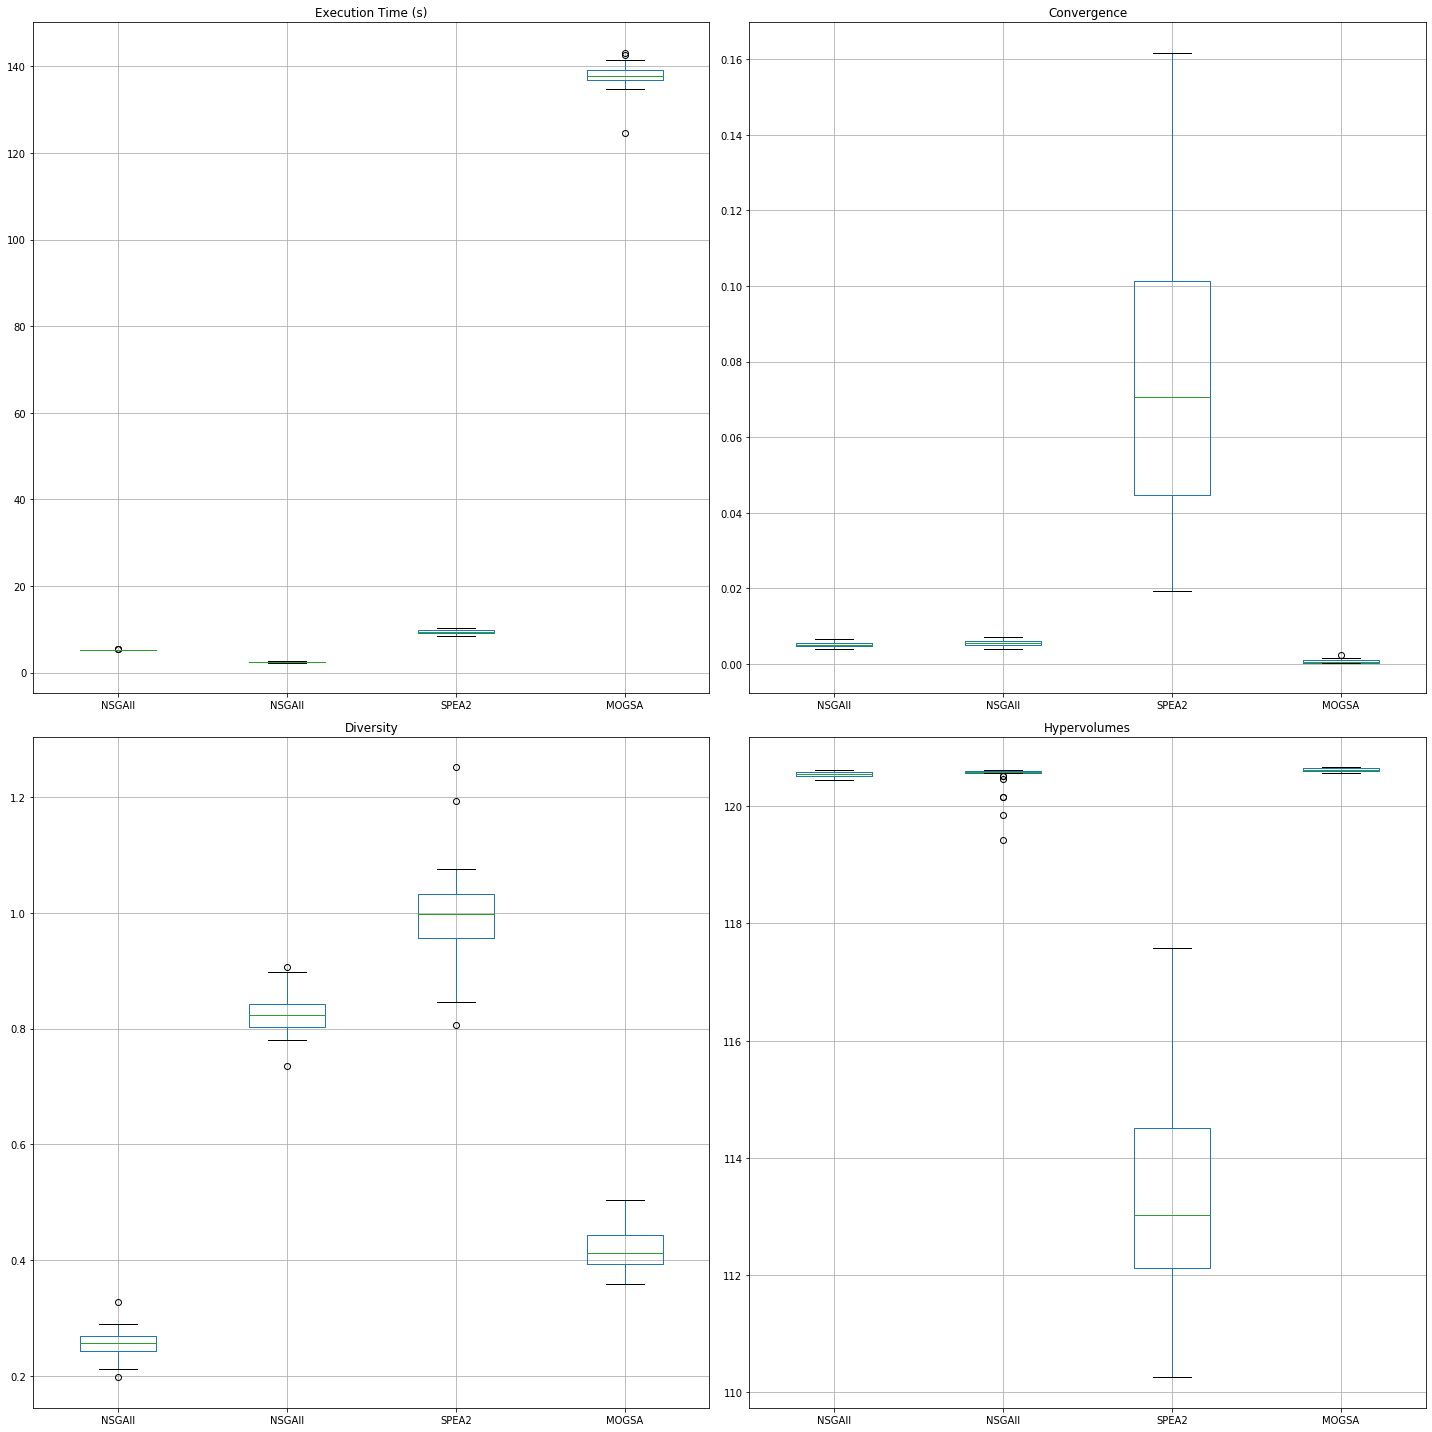

In [112]:
# Boîte à moustaches
juphelpers.bData.box_plot_solutions(list_of_solutions_continu)

### 6.2 Cas Discret

In [113]:
juphelpers.GeneralCases.open_csv(folderOfCSVs+"/"+CsvFileNameDiscret)

,Methods,Data,Number of runs,Real points,Fake points,Average time of execution (s),Average convergence,Average diversity,Average hypervolume
0,NSGAII,ZDT1,30,100,100,1.952908,0.000742,0.314567,120.654461
1,NSGAIII,ZDT1,30,100,100,2.264813,0.000952,0.413922,120.602627
2,SPEA2,ZDT1,30,100,100,84.984751,0.001252,0.152315,120.652560
3,MOGSA,ZDT1,30,100,100,307.090500,0.001041,0.331467,120.659283
4,Simple Cull,ZDT1,30,100,100,0.039524,0.001041,0.331467,120.659283
5,PSA,ZDT1,30,100,100,5.370069,0.001039,0.377721,120.606463
6,BinaryTabuSearch,ZDT1,30,100,100,0.102795,0.001037,0.340288,120.659283
7,FullNonDominatedSortingAndRanking,ZDT1,30,100,100,0.380576,0.001006,0.295079,120.658752


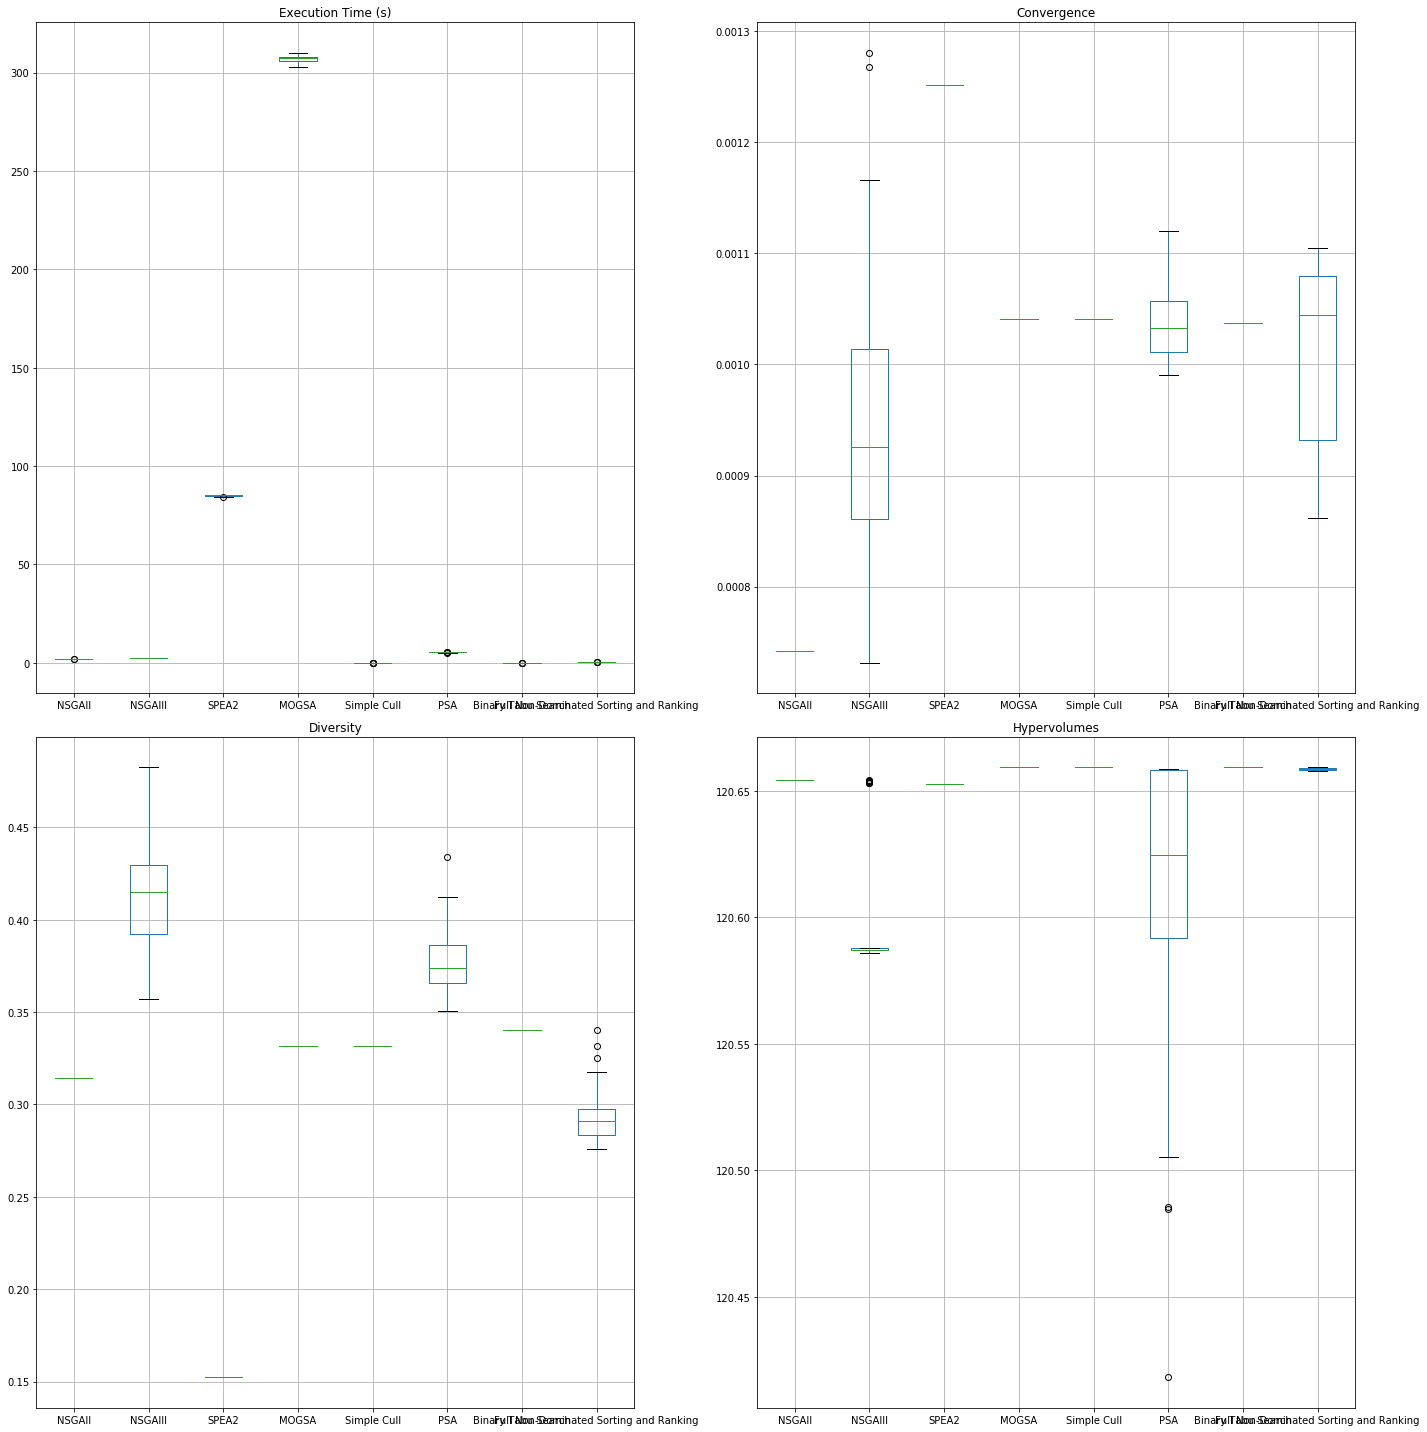

In [114]:
# Boîte à moustaches
juphelpers.bData.box_plot_solutions(list_of_solutions_discret)

---
<a id='Conclusion'></a>
## 7. Conclusion

Différents algorithmes d'optimisation multiobjectifs ont été testés et comparés à l'aide de différentes métaheuristiques. Certains algorithmes ont également été réalisés dans les deux versions (continue et binaire). Trois mesures ont été choisies pour comparer les algorithmes **(hypervolume, convergence et divergence)**.

Les algorithmes génétiques binaires ont obtenu d’excellents résultats de hypervolume, de convergence et de divergence. Des algorithmes tels que Simple Cull, Full Non-Dominated Sorting and Ranking et Binary Tabu Search ont obtenu d’excellentes convergences, mais ce sont des algorithmes qui étudient l’espace de point entier pour chaque point, de sorte qu’ils ont des **complexités de $ O(N^2 \cdot dim) $**, de sorte qu’ils auront un temps d’exécution long pour les grandes bases de données. Il convient également de noter que le PSA, même si c’est le processus qui utilise le moins d’informations sur tous les points, donne de bons résultats.

La méthode MOGSA a en effet abouti à des résultats de convergence optimaux, comme le prévoyaient plusieurs articles. Même si la version binaire donne de bons résultats, c’est un algorithme dont **les opérateurs peuvent encore être exploités**. Comme indiqué précédemment, au moment de la création de ce code, il n'y a pas beaucoup d'informations sur une version version binaire de la méthode MOGSA, par conséquent, la version continue a été modifiée et un opérateur de mutation a été ajouté.

Des algorithmes tels que Full Non-Dominated Sorting and Ranking, MOGSA, NSGSAII et NSGSAIII présentent un grand avantage: ils fournissent des fronts de Pareto secondaires, tertiaires, jusqu'au dernier point de la base de données ou population. Par conséquent, **NSGSAII et NSGAIII** étant une méthode cohérente et largement utilisée offrant de grands avantages (comme la vitesse), cet algorithme serait un excellent choix pour une utilisation dans des projets plus robustes (sans abandonner l'utilité de tester d'autres algorithmes et de réaliser une ingénierie de données pour sélectionner les meilleurs points des résultats NSGSAII et III pour améliorer la diversité).

Donc, si le problème a peu des points, il est conseillé d’utiliser des algorithmes déterministes tels que **Simple Cull** et **Non-Dominated Sorting and Ranking**, en particulier ce dernier, car il fournit d’autres fronts secondaires, tiers, etc. Cependant, si il y a beaucoup de données, il est conseillé d’utiliser **SPEA2** (régler les paramètres pour optimiser la vitesse) pour avoir une bonne diversité ou d’utiliser **NSGAII** (peu de fonctions à optimiser) et **NSGAIII** (dans le cas de plusieurs fonctions à optimiser) pour obtenir, avec grande vitesse et presque constante, non seulement le front de Pareto, mais aussi d’autres fronts ainsi que Non-Dominated Sorting and Ranking algorithm. Quelle que soit la méthode utilisée, la distance d'encombrement (crowding distance) peut être utilisée pour réduire intelligemment le nombre de points dans le front de Pareto et continuer à avoir des points qui le décrivent bien (afin que la diversité soit améliorée).

---
<a id='AnnexeA'></a>
## 8. Annexe A - Autres algorithmes

<a id='ParetoAntColony'></a>
### 8.1 Pareto Ant Colony

#### 8.1.1 introduction

L'idée est très simple. Ceci est un algorithme basé sur une colonie de fourmis et sur leur comportement. Les fourmis laissent des traces de phéromone à leur passage, faisant passer d'autres fourmis au même endroit. Une fourmi donnée suivrait le chemin avec plus de phéromones. Dans cet algorithme, les chemins qui ont les points les plus importants reçoivent plus de phéromone à chaque itération.

#### 8.1.2 Méthodologie

Image prise à partir de [[1]](#PACO):
![PseudocodePACO1](images/PACO1.png)
![PseudocodePACO2](images/PACO2.png)

#### 8.1.3 Discussion

Tout d'abord à propos de P-ACO. C’est un algorithme très ouvert, c’est-à-dire qu’il est nécessaire de disposer d’informations initiales sur le problème et le jeu de données pour établir des règles différentes, pouvant même conduire à la recherche de bonnes solutions, mais n’appartenant pas à la courbe de Pareto en fonction de la critère de choix des 2 meilleures fourmis.

Toujours en relation avec P-ACO, c’est un algorithme qu’il convient d’améliorer avec d’autres techniques (telle que l’approche de calcul des informations heuristiques dynamiques[[2]](#ModifiedPACO)) afin d’accroître sa robustesse. **Chaque technique peut augmenter de manière exponentielle la complexité de l'algorithme qui peut varier considérablement en fonction du nombre de fourmis et de points.**

Enfin, il existe un algorithme appelé m-ACO selon lequel les fourmis pouvant trouver une courbe de Pareto seront récompensées. Cet algorithme se trouve dans la même situation que P-ACO en ce qui concerne les améliorations et, avec les améliorations, **le SPEA (version antérieure à SPEA2 qui, à son tour, donne des résultats pouvant être dépassés par la NSGAII) a des résultats proches ou meilleurs que le m-ACO**.[[3]](#m-ACO)

##### 8.1.4 Bibliographie
<a id='PACO'></a>
1. https://link.springer.com/content/pdf/10.1023%2FB%3AANOR.0000039513.99038.c6.pdf
<a id='ModifiedPACO'></a>
2. https://www.hindawi.com/journals/ijae/2017/1746124/
<a id='m-ACO'></a>
3. https://www.researchgate.net/publication/4302134_Ant_Colony_Optimization_for_Multi-Objective_Optimization_Problems

---
<a id='MOPS'></a>
### 8.2 Multi-Objective Particle Swarm

#### 8.2.1 introduction

C'est un algorithme qui tentera de manière itérative d'améliorer les résultats des candidats possibles (particules) par rapport aux différents objectifs tout en essayant d'établir une courbe de Pareto.

#### 8.2.2 Méthodologie
Cet algorithme est très proche de [NSGSA](#NSGSA), où chaque particule va changer sa vitesse et sa position par rapport à une autre particule. Ce qui diffère, c'est que la mise à jour (qui concerne uniquement la position et la vitesse) est mise à jour par rapport à un point singulier (la "particule principale") et aux informations de la particule en cours de mise à jour (en tant que meilleure position).

Image prise à partir de [[1]](#HumanInteractionMultiObjectivePSO):
![MOPSO-PSEUDO](images/MOPSO-PSEUDO.png)
![MOPSO-PSEUDO2](images/MOPSO-PSEUDO2.png)

#### 8.2.3 Discussion

Il convient de noter qu'il s'agit d'une méthode moins robuste que [NSGSA](#NSGSA), dans laquelle seules les informations en deux points seront prises en compte pour les mises à jour. En fait, selon les résultats illustrés dans [[1]](#HumanInteractionMultiObjectivePSO), dans un cas, l’algorithme privilégiait un objectif plus que l’autre dans la recherche de la courbe de Pareto, tandis que dans l’autre, il classait certains points non dominés en points dominés.

##### 8.2.4 Bibliographie
<a id='HumanInteractionMultiObjectivePSO'></a>
1. https://www.sciencedirect.com/science/article/pii/S0895717710000695#fd9

## Bibliographie Générale
<a id='BGNSGAII'></a>
1. [Results avec NSGAII](https://www.researchgate.net/figure/Comparison-between-GA-NSGA-II-and-NSGA_fig1_235697487)
<a id='BGNSGSA'></a>
2. [Resultats avec NSGSA](http://icsi11.eisti.fr/papers/paper_12.pdf)
<a id='BGComp'></a>
3. [Comparaison entre différents algorithmes](https://www.google.com/url?sa=i&rct=j&q=&esrc=s&source=images&cd=&ved=2ahUKEwjY7aijlonjAhVr8-AKHVI4C_cQ5TV6BAgBEAs&url=http%3A%2F%2Fwww.itiis.org%2Fdigital-library%2Fmanuscript%2Ffile%2F1714%2FTIIS%2BVol%2B11%2C%2BNo%2B6-5.pdf&psig=AOvVaw3iiTXtf-9Qy0ZPYB8Zk8Cp&ust=1561708052099278)
<a id='metriquesconvergenceetdiversity'></a>
4. [Metrics: convergence and diversity](https://deap.readthedocs.io/en/master/api/benchmarks.html)
<a id='metriqueshypervolume'></a>
5. [Metrics: hypervolume](https://hal.inria.fr/inria-00638989/file/tcspaper.pdf)
<a id='paretofrontexpl'></a>
6. [Pareto front](https://en.wikipedia.org/wiki/Pareto_efficiency)